In [1]:
## Generate a filter bank of 48 image filters, each with 32*32

import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2

plt.rcParams['figure.figsize'] = [12,8]
SIZE = 32


# Gaussian filter

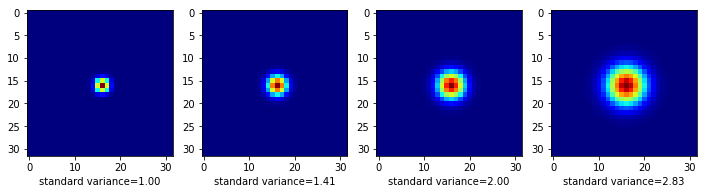

In [5]:
plt.rcParams['figure.figsize'] = [12,8]
def gaussian2D(svar, SIZE):
    var = svar * svar
    shape = (SIZE,SIZE)
    n,m = [i/2 for i in shape]
    x,y = np.ogrid[-m:m,-n:n]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var))
    return g

GF = np.zeros([SIZE,SIZE, 4]) #Gaussian Filter
svar = np.array([1,np.sqrt(2),2,2*np.sqrt(2)]) #standard variance

for i in range(4):
    GF[:,:,i] = gaussian2D(svar[i], SIZE)
    plt.subplot(1,4,i+1)
    #plt.axis('off')
    plt.xlabel('standard variance='+str('%.2f' %svar[i]))
    plt.imshow(GF[:,:,i], cmap = plt.cm.jet)

# LoG filter

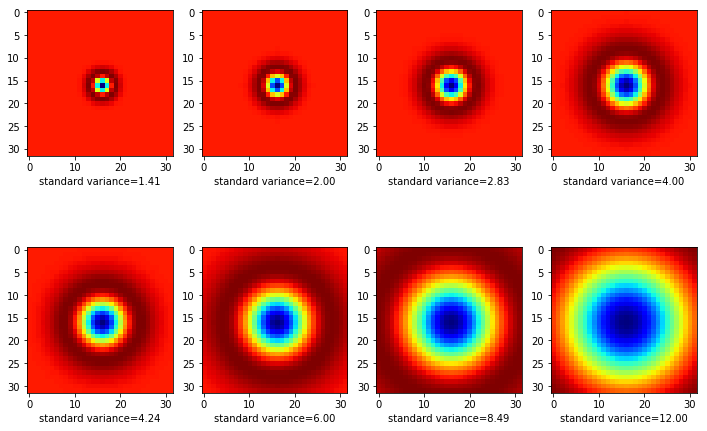

In [6]:
def LoG2D(svar, SIZE):
    var = svar * svar
    shape = (SIZE,SIZE)
    n,m = [i/2 for i in shape]
    x,y = np.ogrid[-m:m,-n:n]
    #print(x)
    #print(y)
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var))
    LoG = -g/var*(2-(x**2+y**2)/var)
    #print(g,LoG)
    return LoG


# x = [np.arange(-SIZE/2,SIZE/2)]
# y = [np.arange(-SIZE/2,SIZE/2)]

LoGF = np.zeros([SIZE,SIZE, 8])
svar = np.array([np.sqrt(2),2,2*np.sqrt(2),4,3*np.sqrt(2),6,6*np.sqrt(2),12]) #standard variance

for i in range(8):
    LoGF[:,:,i] = LoG2D(svar[i], SIZE)
    plt.subplot(2,4,i+1)
    #plt.axis('off')
    plt.xlabel('standard variance='+str('%.2f' %svar[i]))
    plt.imshow(LoGF[:,:,i], cmap = plt.cm.jet)

# 1st x first derivation of Gaussion Filter

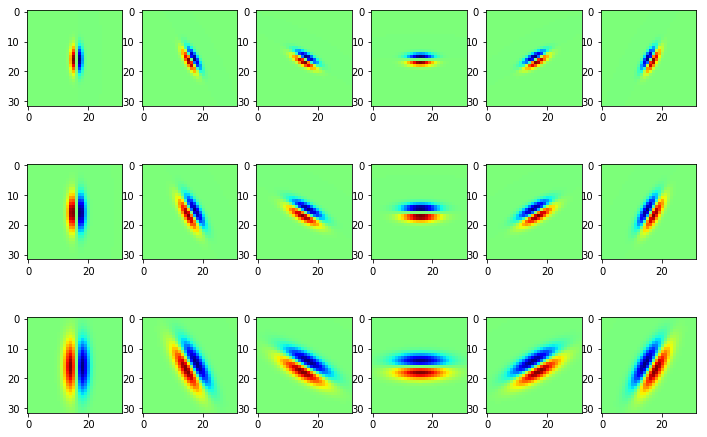

In [7]:
def gaussian1D(svar, x):
    var = svar * svar
    g = (1/np.sqrt(2*np.pi*var))*(np.exp((-1*x*x)/(2*var)))
    return g

def gaussian1stD(svar, x):
    var = svar * svar
    g = gaussian1D(svar,x)
    gx = -x*g/var
    return gx

FGF = np.zeros([SIZE,SIZE, 18]) #first deri
svar = np.array([1,np.sqrt(2),2]) #standard variance
theta = np.pi*np.array(range(0,6))/6
x = [np.arange(-SIZE/2,SIZE/2)]
y = [np.arange(-SIZE/2,SIZE/2)]

[x,y] = np.meshgrid(x,y)
arr = np.array([x.flatten(), y.flatten()])

for i in range(3):
    for j in range(6):
        rotm = np.array([[np.cos(theta[j]),-np.sin(theta[j])],[np.sin(theta[j]),np.cos(theta[j])]])
        #print(rotm.shape)
        rotArr = np.dot(rotm,arr)
        gx = gaussian1stD(svar[i],rotArr[0,:])
        g_y = gaussian1D(3*svar[i],rotArr[1,:])
        FGF[:,:,i*6+j] = np.reshape(gx*g_y,(32,32))
        plt.subplot(3,6,i*6+j+1)
        plt.imshow(FGF[:,:,i*6+j], cmap = plt.cm.jet)
        
        


# 2nd x derivation of Gaussion Filter

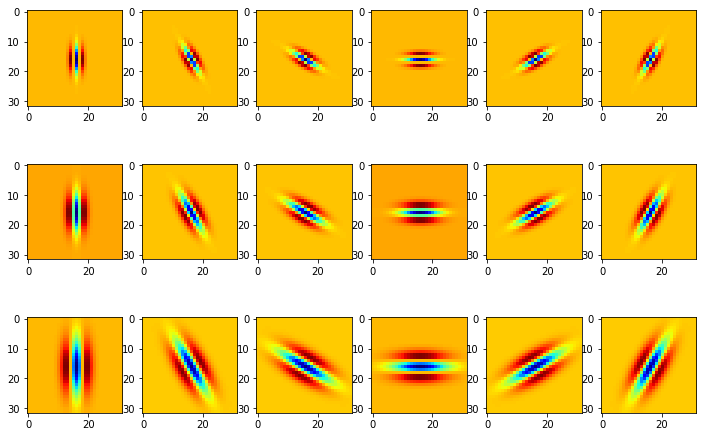

In [8]:
def gaussian2ndD(svar, x):
    var = svar * svar
    g = gaussian1D(svar,x)
    gx = -g/var*(1-x*x/var)
    return gx

SGF = np.zeros([SIZE,SIZE, 18]) #second deri

for i in range(3):
    for j in range(6):
        rotm = np.array([[np.cos(theta[j]),-np.sin(theta[j])],[np.sin(theta[j]),np.cos(theta[j])]])
        #print(rotm.shape)
        rotArr = np.dot(rotm,arr)
        gx = gaussian2ndD(svar[i],rotArr[0,:])
        g_y = gaussian1D(3*svar[i],rotArr[1,:])
        SGF[:,:,i*6+j] = np.reshape(gx*g_y,(32,32))
        plt.subplot(3,6,i*6+j+1)
        plt.imshow(SGF[:,:,i*6+j], cmap = plt.cm.jet)
        

In [9]:
#save filters bank
plt.rcParams['figure.figsize'] = [100,80]
FilterBank = np.zeros([SIZE,SIZE, 48])
for i in range(4):
    FilterBank[:,:,i] = GF[:,:,i]
for i in range(8):
    FilterBank[:,:,4+i] = LoGF[:,:,i]
for i in range(18):
    FilterBank[:,:,12+i] = FGF[:,:,i]
for i in range(18):
    FilterBank[:,:,30+i] = SGF[:,:,i]

np.save('FilterBank.npy',FilterBank)
    # for i in range(48):
#     plt.subplot(8,6,i+1)
#     plt.axis('off')
#     plt.imshow(FilterBank[:,:,i], cmap = plt.cm.jet)

In [10]:
leapord = cv2.imread('Assignment1_data/Assignment1_twoImg/leopard.jpg', cv2.IMREAD_GRAYSCALE)
panda = cv2.imread('Assignment1_data/Assignment1_twoImg/panda.jpg', cv2.IMREAD_GRAYSCALE)
mean1, mean2 = [],[]
var1, var2 = [],[]

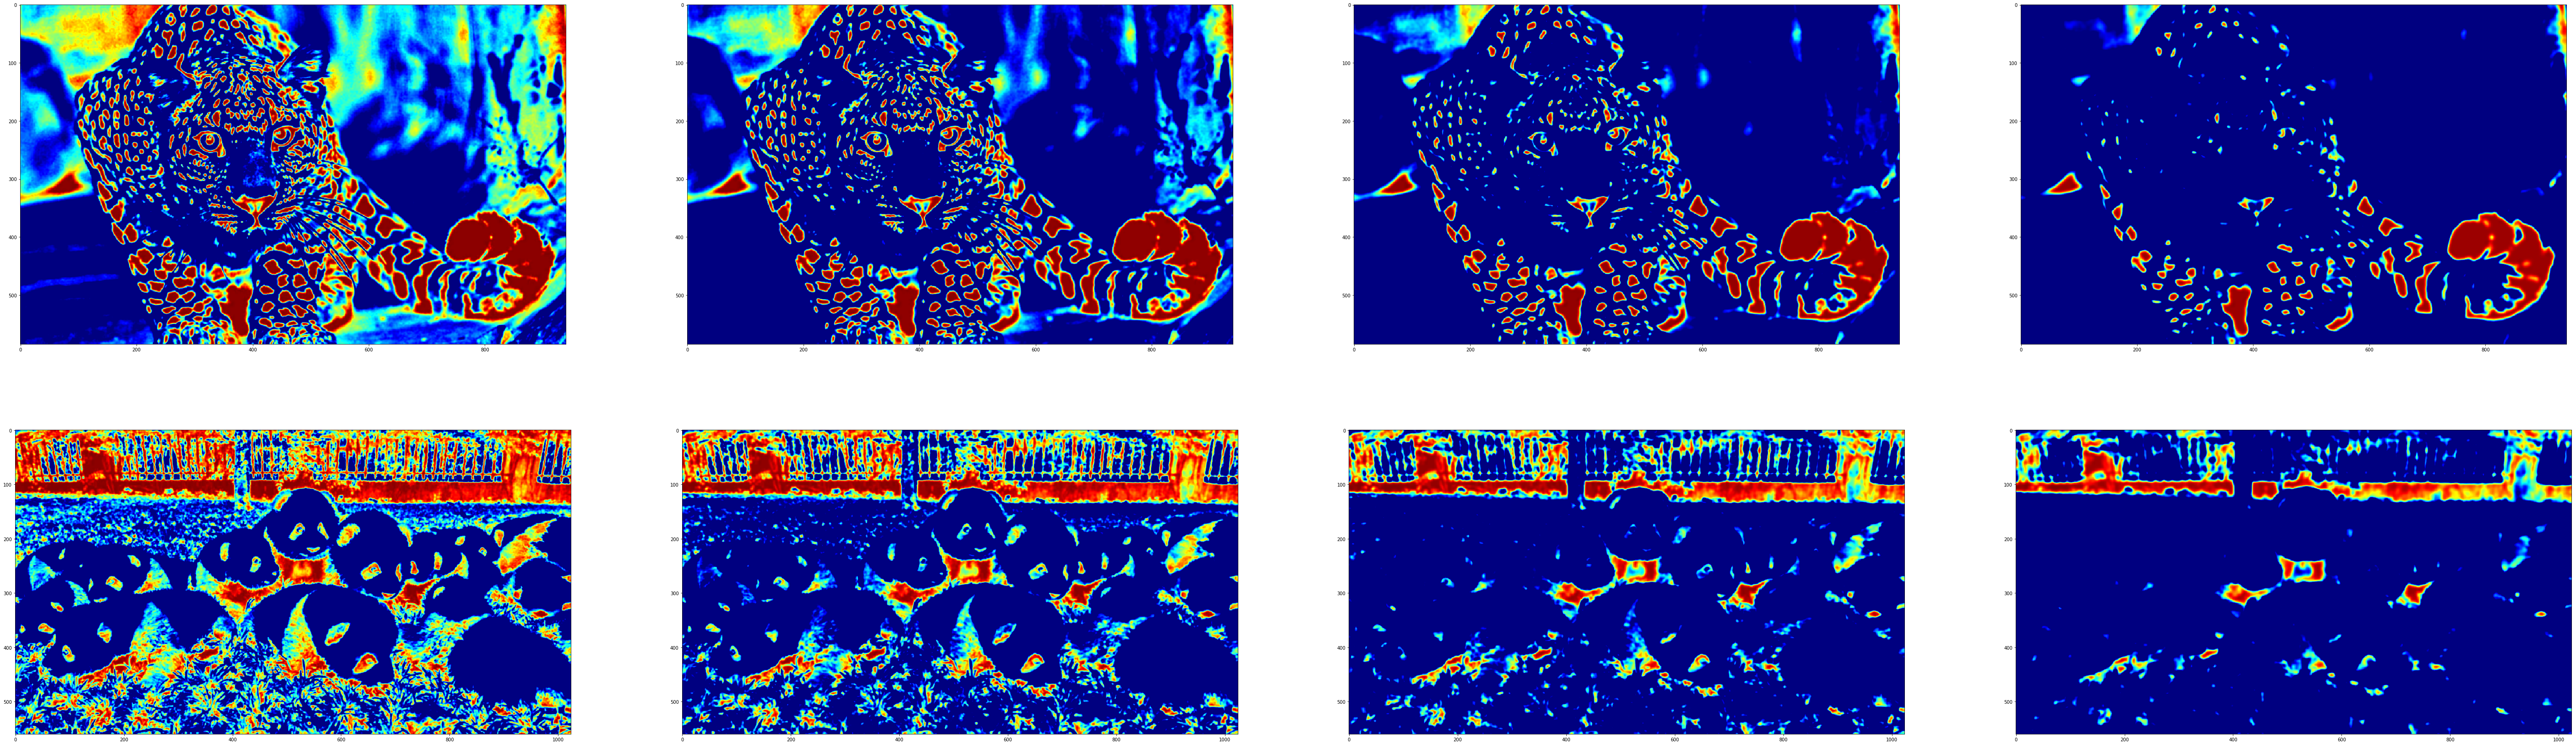

In [11]:
plt.rcParams['figure.figsize'] = [100,30]
for i in range(4):
    res1 = cv2.filter2D(leapord,-1,GF[:,:,i])
    m,sv = cv2.meanStdDev(res1)
    mean1.append(m)
    var1.append(sv*sv)
    res1 = cv2.applyColorMap(res1, cv2.COLORMAP_JET)
    res2 = cv2.filter2D(panda,-1,GF[:,:,i])
    m,sv = cv2.meanStdDev(res2)
    mean2.append(m)
    var2.append(sv*sv)
    res2 = cv2.applyColorMap(res2, cv2.COLORMAP_JET)
    plt.subplot(2,4,i+1)
    plt.imshow(res1)
    #plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
    plt.subplot(2,4,i+5)
    plt.imshow(res2)
    #plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))

In [12]:
print(mean1)
print(var1)

[array([[181.61654846]]), array([[209.54570286]]), array([[227.57480997]]), array([[238.44634843]])]
[array([[6576.01184108]]), array([[5690.87556719]]), array([[4255.73241947]]), array([[2904.17054031]])]


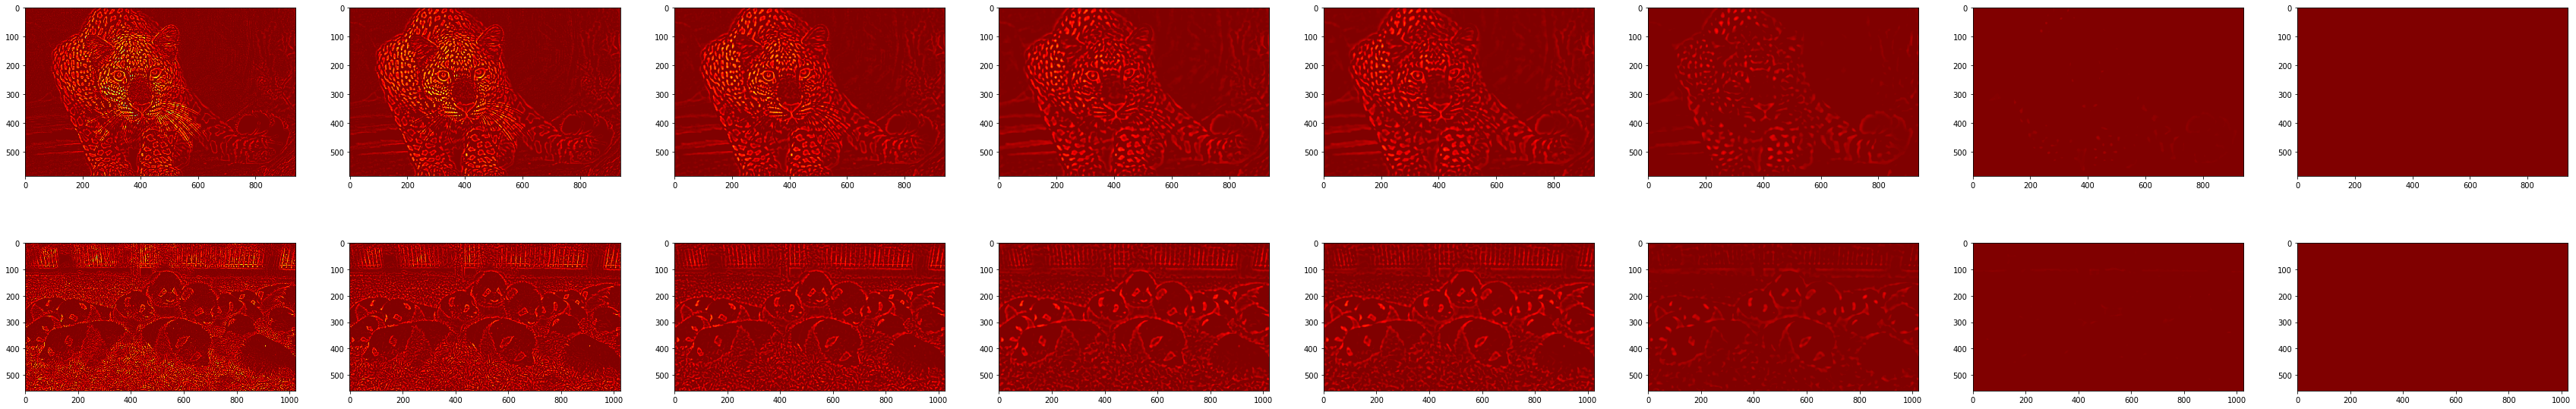

In [13]:
plt.rcParams['figure.figsize'] = [60,10]
for i in range(8):
    res1 = cv2.filter2D(leapord,-1,LoGF[:,:,i])
    m,sv = cv2.meanStdDev(res1)
    mean1.append(m)
    var1.append(sv*sv)
    res1 = cv2.applyColorMap(res1, cv2.COLORMAP_JET)
    res2 = cv2.filter2D(panda,-1,LoGF[:,:,i])
    m,sv = cv2.meanStdDev(res2)
    mean2.append(m)
    var2.append(sv*sv)
    res2 = cv2.applyColorMap(res2, cv2.COLORMAP_JET)
    plt.subplot(2,8,i+1)
    plt.imshow(res1)
    plt.subplot(2,8,i+9)
    plt.imshow(res2)

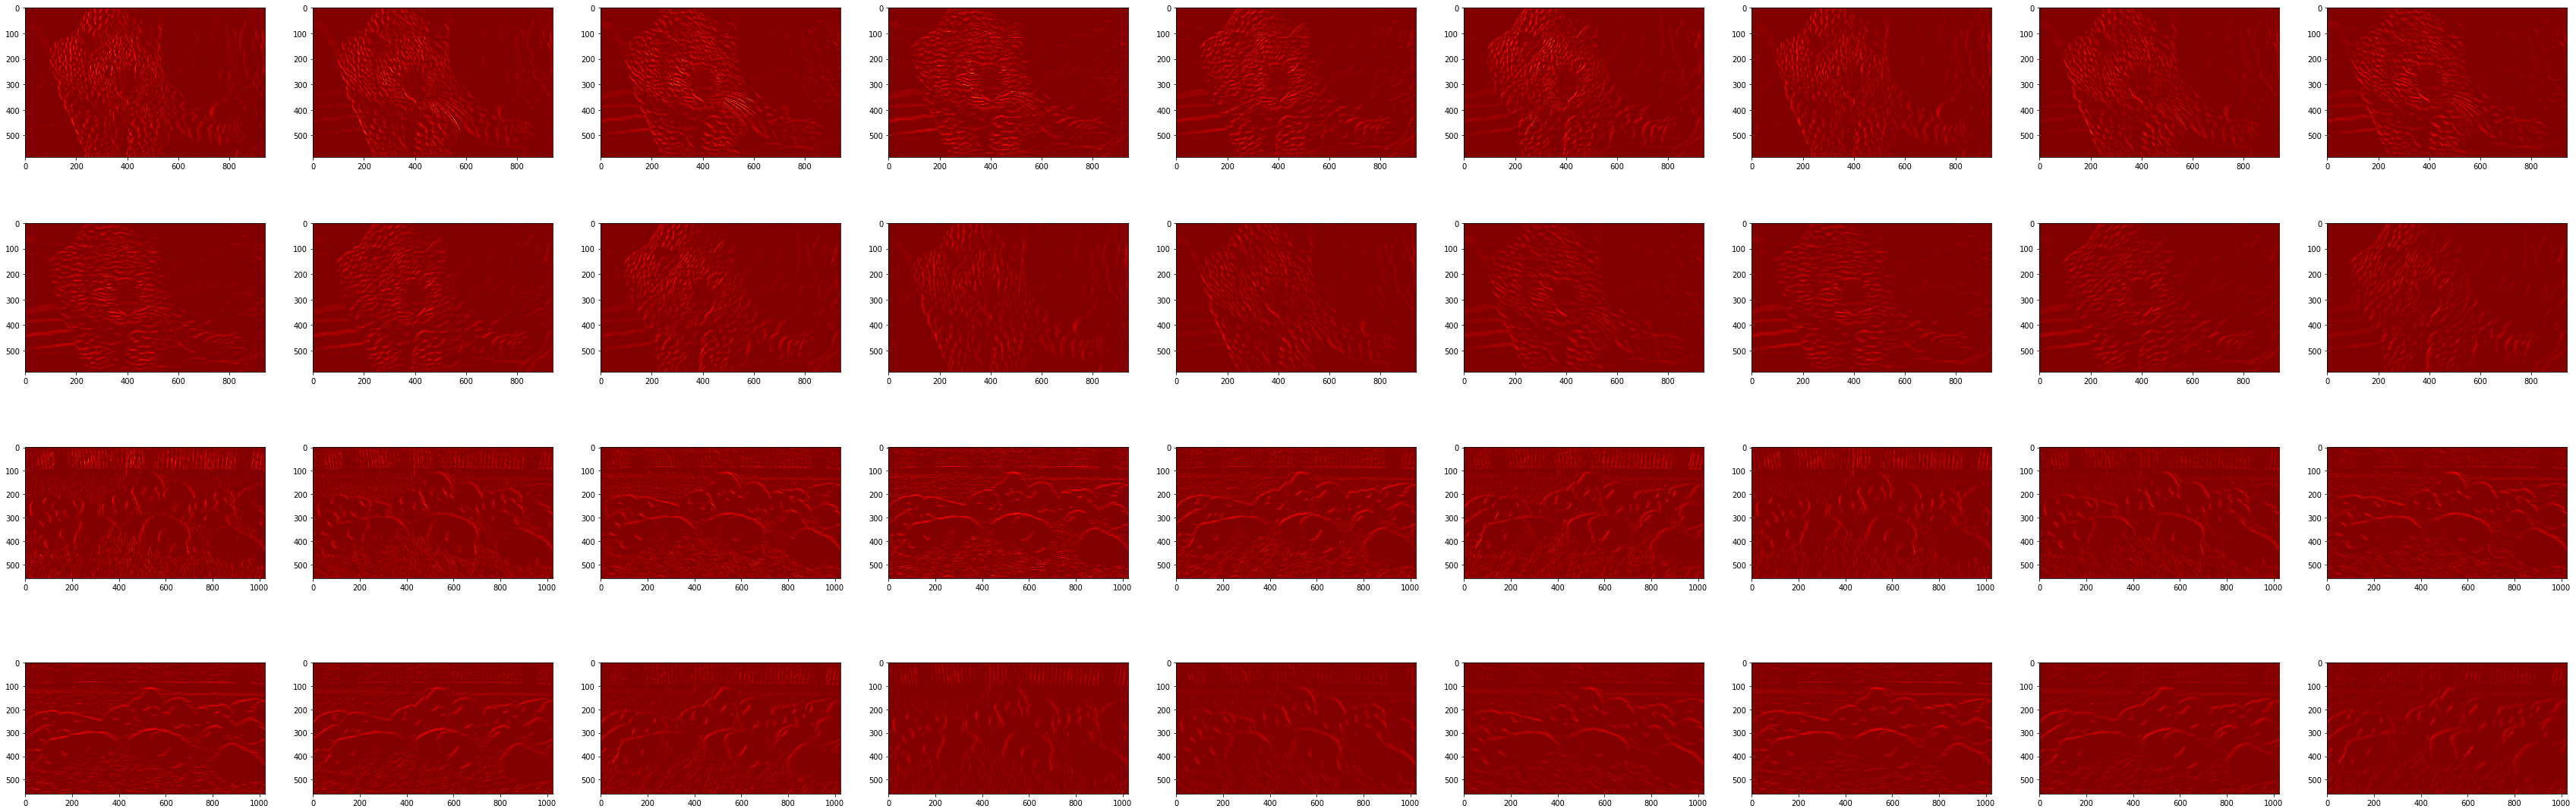

In [14]:
plt.rcParams['figure.figsize'] = [60,20]
for i in range(18):
    res1 = cv2.filter2D(leapord,-1,FGF[:,:,i])
    m,sv = cv2.meanStdDev(res1)
    mean1.append(m)
    var1.append(sv*sv)
    res1 = cv2.applyColorMap(res1, cv2.COLORMAP_JET)
    res2 = cv2.filter2D(panda,-1,FGF[:,:,i])
    m,sv = cv2.meanStdDev(res2)
    mean2.append(m)
    var2.append(sv*sv)
    res2 = cv2.applyColorMap(res2, cv2.COLORMAP_JET)
    plt.subplot(4,9,i+1)
    plt.imshow(res1)
    plt.subplot(4,9,i+19)
    plt.imshow(res2)

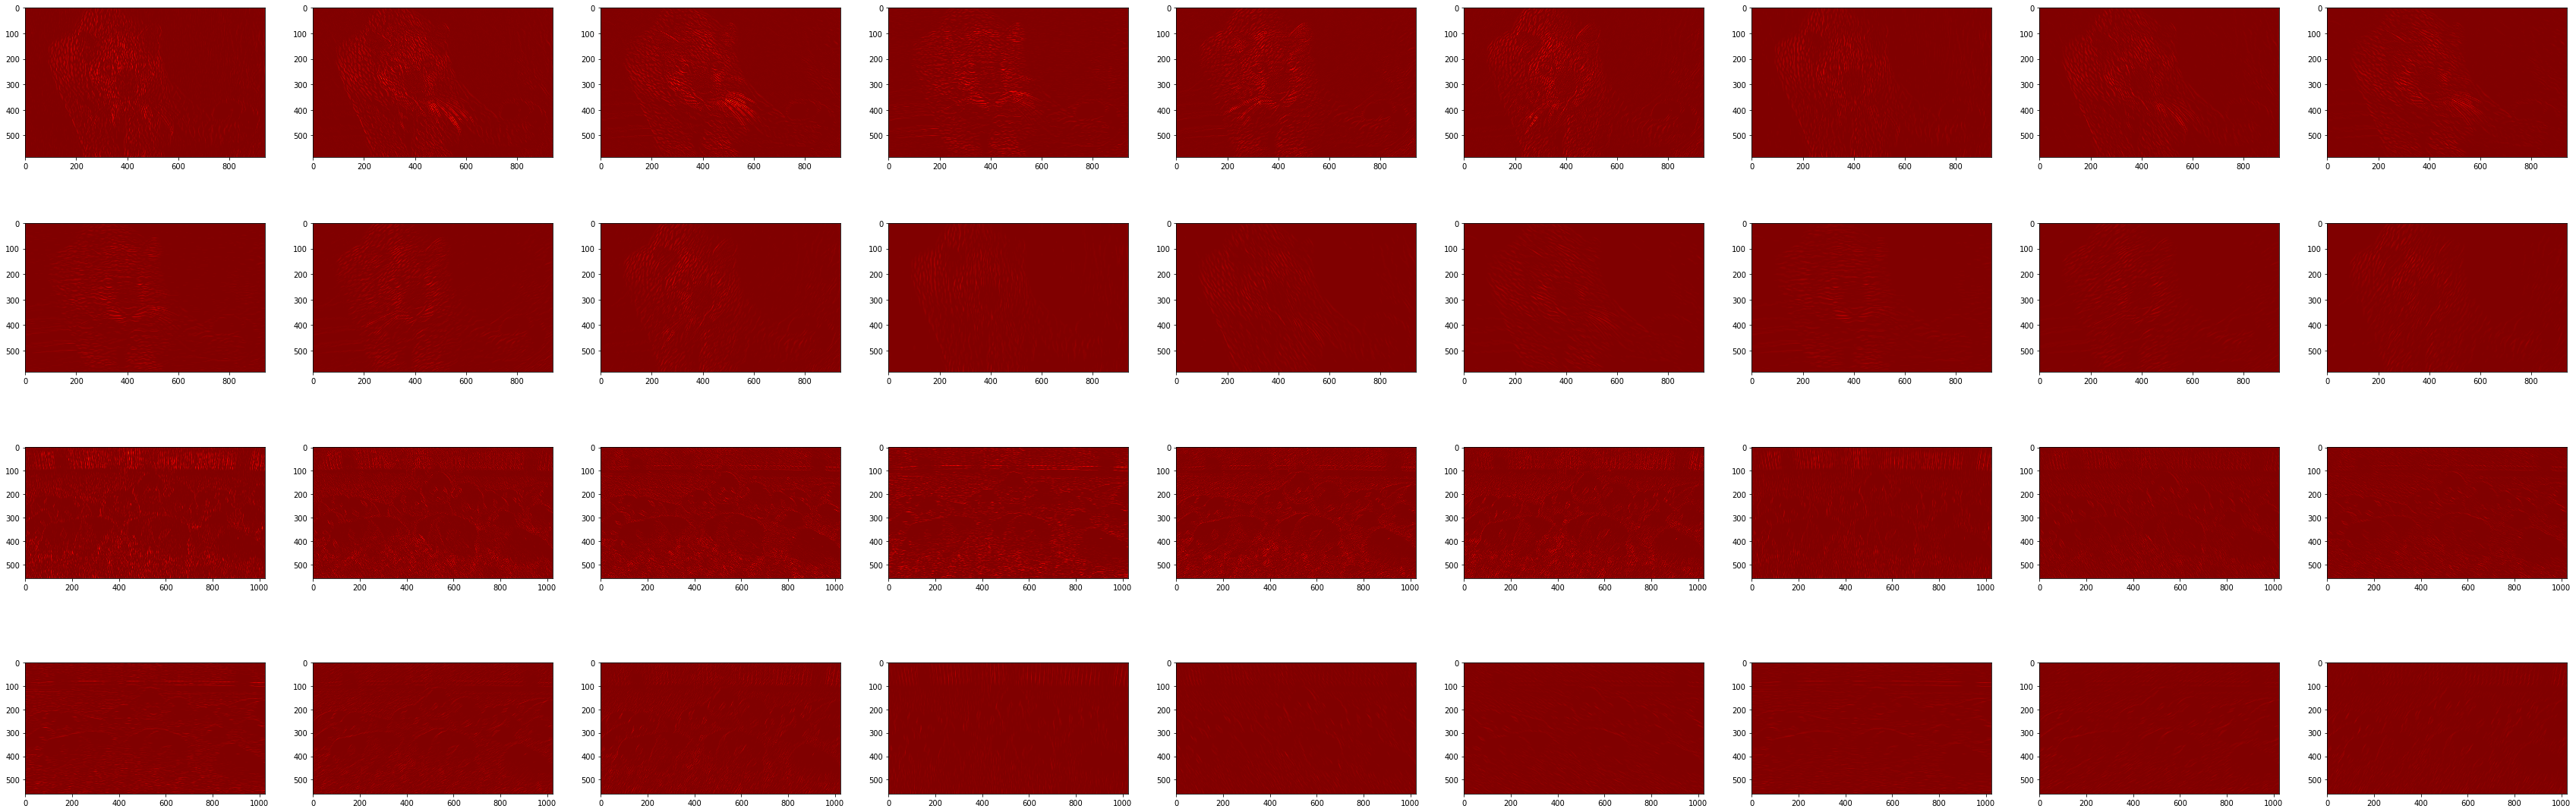

In [15]:
plt.rcParams['figure.figsize'] = [60,20]
for i in range(18):
    res1 = cv2.filter2D(leapord,-1,SGF[:,:,i])
    m,sv = cv2.meanStdDev(res1)
    mean1.append(m)
    var1.append(sv*sv)
    res1 = cv2.applyColorMap(res1, cv2.COLORMAP_JET)
    res2 = cv2.filter2D(panda,-1,SGF[:,:,i])
    m,sv = cv2.meanStdDev(res2)
    mean2.append(m)
    var2.append(sv*sv)
    res2 = cv2.applyColorMap(res2, cv2.COLORMAP_JET)
    plt.subplot(4,9,i+1)
    plt.imshow(res1)
    plt.subplot(4,9,i+19)
    plt.imshow(res2)

In [16]:
print(len(mean1),len(var1))
print(len(mean2),len(var2))
print(np.argmax(mean1))
print(np.argmax(mean2))
print(np.argmax(var1))
print(np.argmax(var2))

(48, 48)
(48, 48)
3
3
0
0
